In [3]:
''' 
Por que se generon algunos NULL values
'''

' \nPor que se generon algunos NULL values\n'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate

In [5]:
df_poblacion_mex = pd.read_csv('Poblacion_Mexicana_Mod.csv')



Dado que se presento Estado con 30, valores unicos pero su cuenta es de 32, asumo que hay valores duplicados

In [6]:
df_poblacion_mex.Estado.nunique()

30

In [7]:

df_poblacion_mex.Estado.count()

32

In [8]:
'''Revision y eliminacion de valores duplicados, en el area de los estados'''

# 1. Obten los valores únicos de la columna y conviértelos en una lista
valores_unicos = df_poblacion_mex['Estado'].unique()

# 2. Verifica si hay valores duplicados en la lista de valores únicos
duplicados = [item for item in valores_unicos if list(df_poblacion_mex['Estado']).count(item) > 1]

# 3. Ahora, puedes imprimir los valores duplicados si los hay.
if not duplicados:
    print("No hay valores duplicados en la lista de valores únicos.")
else:
    print("Valores duplicados en la lista de valores únicos:")
    print(duplicados)

Valores duplicados en la lista de valores únicos:
['Quintana Roo', 'Nayarit']


In [9]:

# 1. Utiliza el método `duplicated()` para encontrar las filas duplicadas.
filas_duplicadas = df_poblacion_mex[df_poblacion_mex['Estado'].duplicated()]

# 2. Luego, puedes usar el método `drop()` para eliminar esas filas del DataFrame original.
df_poblacion_mex_wo_duplicated = df_poblacion_mex.drop(filas_duplicadas.index)

# 3. Ahora, df_sin_duplicados contendrá tu DataFrame original sin las filas que contenían valores duplicados.

# Puedes imprimir df_sin_duplicados para verificar que se eliminaron las filas duplicadas.
print(df_poblacion_mex_wo_duplicated.Estado.nunique())


30


In [10]:
df_poblacion_mex_wo_duplicated.Estado.unique()

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Coahuila de Zaragoza', 'Colima', 'Chiapas',
       'Chihuahua', 'Estado de México', 'Morelos', 'Puebla', 'Tlaxcala',
       'Querétaro', 'Guanajuato', 'Hidalgo', 'Veracruz', 'Tabasco',
       'Quintana Roo', 'Sonora', 'Sinaloa', 'Nayarit', 'Durango',
       'Zacatecas', 'Tamaulipas', 'San Luis Potosí', 'Guerrero', 'Oaxaca',
       'Ciudad de México', 'Yucatán', 'Michoacán de Ocampo'], dtype=object)

In [11]:
'''
melt() se utiliza para "derretir" o "apilar" columnas. En este caso, usamos melt() 
para convertir las columnas 'México' y 'Nuevo León' en una sola columna llamada 'Estado', 
manteniendo la información de 'Año'. Esto crea un DataFrame largo con 
tres columnas: 'Año', 'Estado' y 'Valor'. Es más fácil trabajar con esta estructura para luego pivotear los datos.


Pivotear: Una vez que tenemos el DataFrame derretido, utilizamos el método pivot() para girar las filas y las columnas. 
Esto nos permite tener los años como columnas y los valores de 'México' y 'Nuevo León' en las filas. El resultado es un 
DataFrame donde los años son columnas y 'México' y 'Nuevo León' se combinan en la columna 'Estado'.


'''

# Supongamos que tienes el DataFrame original con las columnas 'Año', 'México' y 'Nuevo León'
data = {
    'Año': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'México': ['122,306,146', '123,605,424', '124,923,181', '126,260,314', '127,618,337', '128,932,489', '130,268,777', '131,628,541', '132,999,898'],
    'Nuevo León': ['5,119,504', '5,232,816', '5,349,155', '5,468,579', '5,591,148', '5,784,442', '5,971,213', '6,161,499', '6,355,642']
}

df_original = pd.DataFrame(data)
#print(df_original)

# 1. Derrite (melt) las columnas 'México' y 'Nuevo León' en una columna 'Estado'
df_melted = pd.melt(df_original, id_vars=['Año'], var_name='Estado', value_name='Valor')
#print(df_melted)

# 2. Pivotea el DataFrame para tener los años como columnas
df_pivoted = df_melted.pivot(index='Estado', columns='Año', values='Valor').reset_index()

# 3. Cambia el nombre de las columnas para que sea más limpio
df_pivoted.columns.name = None

# 4. Verifica el DataFrame final
print(df_pivoted)


       Estado         2015         2016         2017         2018  \
0      México  122,306,146  123,605,424  124,923,181  126,260,314   
1  Nuevo León    5,119,504    5,232,816    5,349,155    5,468,579   

          2019         2020         2021         2022         2023  
0  127,618,337  128,932,489  130,268,777  131,628,541  132,999,898  
1    5,591,148    5,784,442    5,971,213    6,161,499    6,355,642  


In [12]:
'''Habia una columna estra;a llamada Unamed, no hacia nada asi que solo era practicamente una copia del idx'''
# print(df_poblacion_mex_wo_duplicated.head(3))
# print(df_pivoted.head(3))

to_delete = list(df_poblacion_mex_wo_duplicated.columns)
# #print(to_delete[0])

df_poblacion_mex_wo_duplicated = df_poblacion_mex_wo_duplicated.drop(to_delete[0], axis = 1)

# print(df_poblacion_mex_wo_duplicated.head(3))

''' Solo fue necesario ejecutarlo una sola vez'''

' Solo fue necesario ejecutarlo una sola vez'

In [13]:
print(df_pivoted.head(3))

       Estado         2015         2016         2017         2018  \
0      México  122,306,146  123,605,424  124,923,181  126,260,314   
1  Nuevo León    5,119,504    5,232,816    5,349,155    5,468,579   

          2019         2020         2021         2022         2023  
0  127,618,337  128,932,489  130,268,777  131,628,541  132,999,898  
1    5,591,148    5,784,442    5,971,213    6,161,499    6,355,642  


In [14]:
'''Union de los dos df '''
df_new_pob_mex_with_states = pd.concat([df_poblacion_mex_wo_duplicated, df_pivoted], ignore_index= True)

print(df_new_pob_mex_with_states.Estado.nunique())

32


salvado de el nuevo df_completo

In [33]:
#index=False en el método to_csv() se utiliza para evitar que se guarde el índice del DataFrame en el archivo CSV. 
df_new_pob_mex_with_states.to_csv('Poblacion_Mex_Corregida.csv', index= False)

''''''

''

# Lectura del segundo data frame

In [62]:
df_sex_agresion =  pd.read_csv('sexual_agre_cleaned.csv')


In [63]:
df_sex_agresion.shape
#  12089 - 6

(12089, 6)

In [64]:
print(df_sex_agresion.head(3))

    A_o  Estado         Tipo_de_abuso      Subtipo_de_Abuso    Mes  Valor
0  2015  Puebla          Acoso sexual          Acoso sexual  Enero     11
1  2015  Puebla  Hostigamiento sexual  Hostigamiento sexual  Enero      1
2  2015  Puebla      Violaci�n simple      Violaci�n simple  Enero     43


In [69]:
'''Cambio de nombre a las columanas'''
# df_sex_agresion = df_sex_agresion.rename(columns={'A_o' : 'Year'})
# df_sex_agresion = df_sex_agresion.rename(columns={'Mes' : 'Month'})
# df_sex_agresion = df_sex_agresion.rename(columns={'Estado' : 'State'})
# df_sex_agresion = df_sex_agresion.rename(columns={'Tipo_de_abuso' : 'Type_of_abuse'})
# df_sex_agresion = df_sex_agresion.rename(columns={'Violaci�n simple' : 'Simple_Violation'})
#df_sex_agresion = df_sex_agresion.rename(columns={'Valor' : 'Count'})


#Drop de subtipo_ya que es igual a tipo
# df_sex_agresion = df_sex_agresion.drop(columns= 'Subtipo_de_Abuso')


In [70]:
print(df_sex_agresion.head(3))

   Year   State         Type_of_abuse  Month  Count
0  2015  Puebla          Acoso sexual  Enero     11
1  2015  Puebla  Hostigamiento sexual  Enero      1
2  2015  Puebla      Violaci�n simple  Enero     43


In [71]:
df_sex_agresion.isnull().sum()

Year             0
State            0
Type_of_abuse    0
Month            0
Count            0
dtype: int64

In [72]:
df_sex_agresion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12089 entries, 0 to 12088
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           12089 non-null  int64 
 1   State          12089 non-null  object
 2   Type_of_abuse  12089 non-null  object
 3   Month          12089 non-null  object
 4   Count          12089 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 472.4+ KB


In [75]:
df_sex_agresion.describe()

,Year,Count
count,12089.000000,12089.000000
mean,2019.002316,24.025891
std,2.581048,44.784881
min,2015.000000,0.000000
25%,2017.000000,1.000000
50%,2019.000000,8.000000
75%,2021.000000,29.000000
max,2023.000000,645.000000


NUEVO EDA

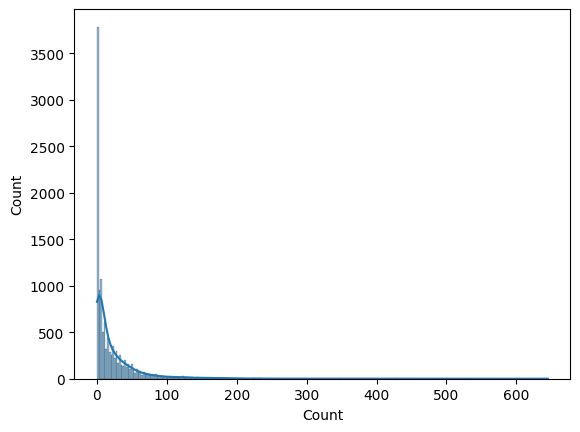

In [79]:
# Ver la distribución de la variable 'Count'
sns.histplot(df_sex_agresion['Count'], kde=True) #Que hace el kde
plt.show()

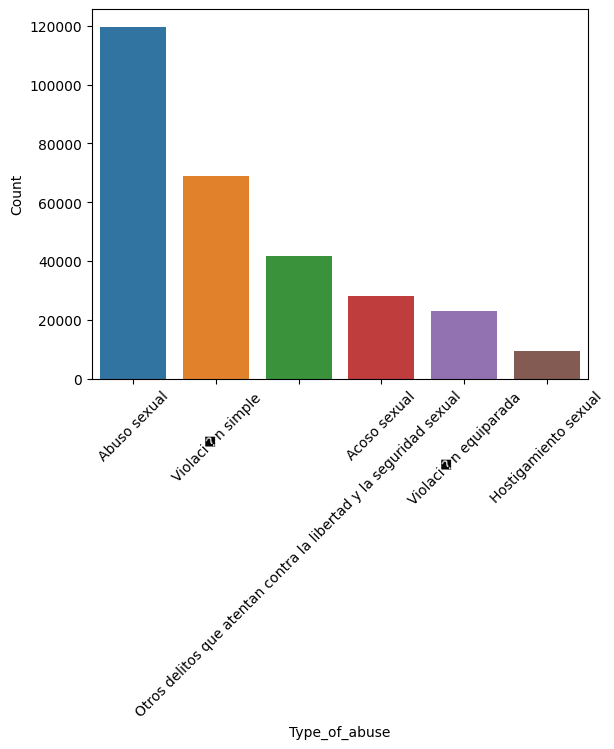

In [92]:
# Ver la sumatoria de 'Count' por tipo de abuso
# df.groupby('Type_of_abuse')['Count'].sum().plot(kind='bar')
# plt.show()

# # Ver la sumatoria de 'Count' por tipo de abuso y ordenarlo
# df_sex_agresion.groupby('Type_of_abuse')['Count'].sum().sort_values().plot(kind='bar')
# plt.show()

# Para orden descendente
# df_sex_agresion.groupby('Type_of_abuse')['Count'].sum().sort_values(ascending=False).plot(kind='bar')
# plt.show()

# Asumiendo df es tu DataFrame
# Crear un nuevo DataFrame con las sumas y ordenarlo
sum_df = df_sex_agresion.groupby('Type_of_abuse')['Count'].sum().reset_index()
sum_df = sum_df.sort_values(by='Count', ascending=False)  # Cambia a True para orden ascendente

# Ahora usar Seaborn para plotear
sns.barplot(data=sum_df, x='Type_of_abuse', y='Count')
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para mejor visualización si es necesario
plt.show()
